In [47]:
import fcnn
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import torch
from torch import nn, Tensor
from os import path
from data.loaders import SteelLoader

In [48]:
network = fcnn.SimpleFCN(dim_out=5)
steel_train = SteelLoader()

batch_losses = []
loss_fn = nn.CrossEntropyLoss()

optim = torch.optim.SGD(network.parameters(), lr = 1e-8, momentum=0.2)

In [49]:
for epoch in range(10):
    steel_train.shuffle()
    for x, y in tqdm(steel_train):
        y_pred = network(x)
        loss = loss_fn(y_pred, y)

        optim.zero_grad()
        loss.backward()
        optim.step()

        batch_losses.append(loss.item())

  0%|          | 0/38 [00:00<?, ?it/s]

RuntimeError: stack expects each tensor to be equal size, but got [5, 256, 1600] at entry 0 and [4, 256, 1600] at entry 2

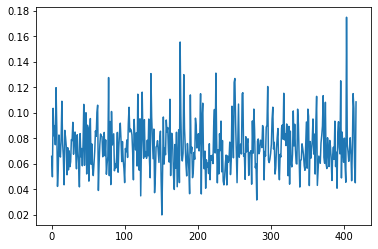

In [ ]:
plt.figure()
plt.plot(batch_losses)
plt.show()
plt.close()

In [ ]:
target_labels = y[0].detach()
predicted_labels = y_pred[0].detach()

In [ ]:
def plot_img(arr):
    arr = np.sum(np.array(arr), axis = 0)
    plt.figure()
    plt.imshow(arr)
    plt.show()
    plt.close()

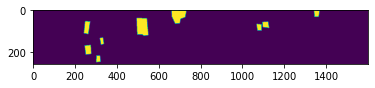

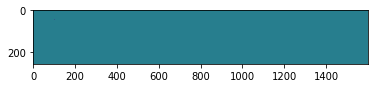

In [ ]:
plot_img(target_labels)
plot_img(predicted_labels)

In [ ]:
torch.save(network.state_dict(), "test_simple_fcnn.torch")

In [ ]:
state_dict = torch.load("test_simple_fcnn.torch")
network.load_state_dict(state_dict)

OrderedDict([('downsample_layers.0.0.weight', tensor([[[[ 0.1593,  0.1822, -0.1604],
          [ 0.0510, -0.0957,  0.1078],
          [ 0.0383, -0.0684, -0.0898]],

         [[ 0.0964, -0.1002,  0.0593],
          [-0.1180,  0.0997, -0.1219],
          [-0.0221, -0.1097, -0.0443]],

         [[-0.0037,  0.0902, -0.1568],
          [-0.1283,  0.1205, -0.1255],
          [ 0.0738, -0.0656,  0.0813]]],


        [[[-0.1019,  0.0433, -0.1510],
          [-0.0182, -0.0128, -0.0198],
          [ 0.1164,  0.0690, -0.1087]],

         [[-0.1639, -0.0979,  0.0212],
          [ 0.0629, -0.1305,  0.0375],
          [ 0.0353, -0.0329, -0.0808]],

         [[ 0.0495, -0.1342, -0.0498],
          [ 0.1438,  0.0785,  0.0299],
          [-0.1778,  0.1819, -0.1458]]],


        [[[ 0.0225,  0.0340, -0.0269],
          [ 0.0312,  0.0967,  0.1786],
          [-0.0771, -0.0222,  0.1108]],

         [[ 0.1572, -0.1410, -0.1865],
          [ 0.0074, -0.0106,  0.0852],
          [ 0.1440,  0.0689, -0.0933]],

<All keys matched successfully>